In [1]:
import pandas as pd 

In [3]:

from functions.functions_data import get_global_daily, get_rolling, get_rolling_values
from functions.functions_graphics import plot_engagements_users, plot_metrics
from functions.functions_data import get_engagement_list_v2


In [2]:
#import the data
def load_data():
    #read the data
    path_to_csv = "data/data_20230606.csv"
    df = pd.read_csv(path_to_csv, parse_dates=['EventDateTime'], dtype={'CurrentPlatform': str,
                                                                        'CurrentType': str,
                                                                        'Platform': str,
                                                                        'Version': str})
    #change data type
    df['EventDateTime'] = pd.to_datetime(df['EventDateTime'])

    #Abreviaturas de los estados de USA
    df_states = pd.read_csv("data/abreviaturas_USA.csv")

    return df, df_states

#call the funcion load_data
df, df_states = load_data()


In [25]:
max_date = pd.to_datetime(df.EventDateTime.max())
min_date = pd.to_datetime(df.EventDateTime.min())

#this data is used in both plots
engagement_list = get_engagement_list_v2(df = df, start_date= min_date, end_data= max_date  )

#data for the plot
global_metrics = get_global_daily(engagement_list)

rolled = get_rolling(global_metrics,int(7), engagement_list)

#plot 
fig = plot_engagements_users(rolled, str(7) +' days')

In [26]:
fig

In [39]:
fig.data[0]["x"]

(Timestamp('2023-03-15 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-16 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-17 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-18 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-19 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-20 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-21 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-22 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-23 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-24 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-25 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-26 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-27 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-28 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-29 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-30 00:00:00+0000', tz='UTC'),
 Timestamp('2023-03-31 00:00:00+0000', tz='UTC'),
 Timestamp('2023-04-01 00:00:00+0000', tz='UTC'),
 Timestamp('2023-04-02 00:00:00+0000', tz='UTC'),
 Timestamp('2023-04-03 00:00:00+0000', tz='UTC'),


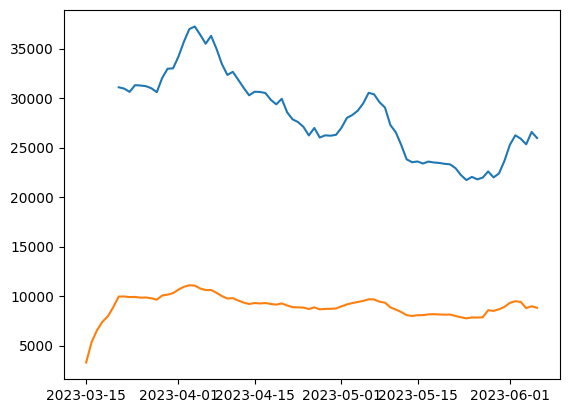

In [36]:
import matplotlib.pyplot as plt

pan = plt.plot(list(rolled.index), list(rolled.Engagements),  list(rolled.index), list(rolled.Unique_users))
plt.show()

Engagements
